# Import Data (Andrew's Code)

In [1]:
import pickle

with open('./data/save.p', 'rb') as f:
    df_list = pickle.load(f)
    
with open('./data/save2.p', 'rb') as f:
    df_list2 = pickle.load(f)

In [3]:
import pandas as pd
data = pd.concat(df_list + df_list2)

data.shape

(11196663, 15)

Hooray! 8.88 million rows!

In [4]:
data.describe()

,OPR_HR,OPR_INTERVAL,POS,MW,GROUP
count,1.119666e+07,11196663.0,11196663.0,1.119666e+07,1.119666e+07
mean,1.248433e+01,0.0,1.0,3.592509e+01,6.085177e+01
std,6.913847e+00,0.0,0.0,3.401073e+01,3.568790e+01
min,1.000000e+00,0.0,1.0,-6.536216e+02,1.000000e+00
25%,6.000000e+00,0.0,1.0,2.477946e+01,2.900000e+01
50%,1.200000e+01,0.0,1.0,3.125286e+01,6.100000e+01
75%,1.800000e+01,0.0,1.0,4.163290e+01,9.300000e+01
max,2.400000e+01,0.0,1.0,1.721694e+03,1.280000e+02


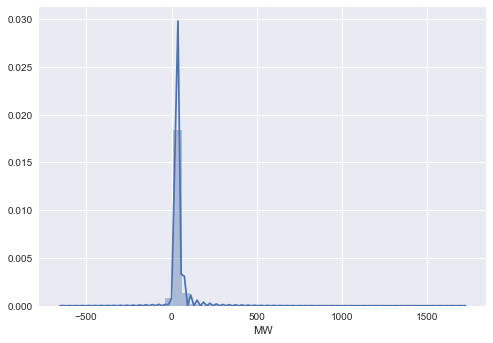

In [61]:
%matplotlib inline
import seaborn as sns

sns.distplot(data['MW'])

/home/hobbs/.local/lib/python3.6/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/home/hobbs/.local/lib/python3.6/site-packages/ggplot/stats/smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
/usr/local/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


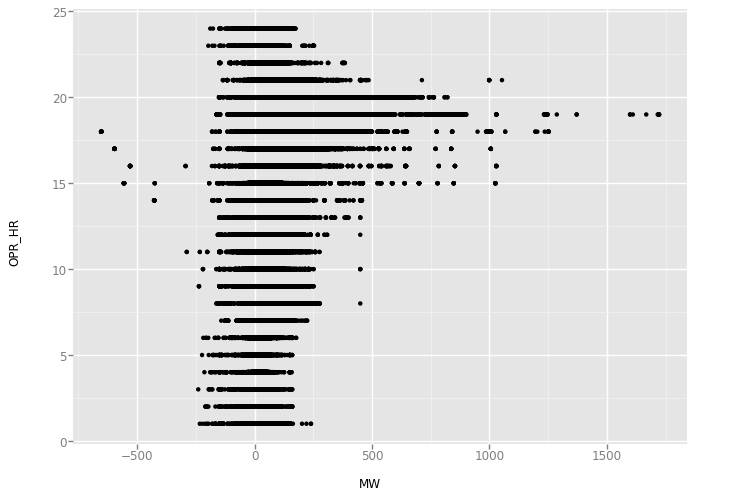

<ggplot: (8788025452201)>

In [6]:
from ggplot import *

ggplot(data, aes(x = 'MW', y = 'OPR_HR')) + geom_point()

Need to let it know the date is a date.

In [63]:
data['datetime'] = pd.to_datetime(data.index.values)
data.dtypes

INTERVALENDTIME_GMT            object
OPR_DT                         object
OPR_HR                          int64
OPR_INTERVAL                    int64
NODE_ID_XML                    object
NODE_ID                        object
NODE                           object
MARKET_RUN_ID                  object
LMP_TYPE                       object
XML_DATA_ITEM                  object
PNODE_RESMRID                  object
GRP_TYPE                       object
POS                             int64
MW                            float64
GROUP                           int64
datetime               datetime64[ns]
dtype: object

In [64]:
#data.reset_index(inplace = True)
useful = data[['MW', 'NODE_ID', 'datetime', 'OPR_HR']]
data.head()

,INTERVALENDTIME_GMT,OPR_DT,OPR_HR,OPR_INTERVAL,NODE_ID_XML,NODE_ID,NODE,MARKET_RUN_ID,LMP_TYPE,XML_DATA_ITEM,PNODE_RESMRID,GRP_TYPE,POS,MW,GROUP,datetime
INTERVALSTARTTIME_GMT,,,,,,,,,,,,,,,,
2017-10-01 13:00:00,2017-10-01T14:00:00-00:00,2017-10-01,7,0,2C559EQ2_7_N001,2C559EQ2_7_N001,2C559EQ2_7_N001,DAM,LMP,LMP_PRC,2C559EQ2_7_N001,ALL,1,29.92267,1,2017-10-01 13:00:00
2017-10-01 16:00:00,2017-10-01T17:00:00-00:00,2017-10-01,10,0,2C559EQ2_7_N001,2C559EQ2_7_N001,2C559EQ2_7_N001,DAM,LMP,LMP_PRC,2C559EQ2_7_N001,ALL,1,5.92280,1,2017-10-01 16:00:00
2017-10-02 04:00:00,2017-10-02T05:00:00-00:00,2017-10-01,22,0,2C559EQ2_7_N001,2C559EQ2_7_N001,2C559EQ2_7_N001,DAM,LMP,LMP_PRC,2C559EQ2_7_N001,ALL,1,35.75493,1,2017-10-02 04:00:00
2017-10-02 03:00:00,2017-10-02T04:00:00-00:00,2017-10-01,21,0,2C559EQ2_7_N001,2C559EQ2_7_N001,2C559EQ2_7_N001,DAM,LMP,LMP_PRC,2C559EQ2_7_N001,ALL,1,43.71311,1,2017-10-02 03:00:00
2017-10-02 05:00:00,2017-10-02T06:00:00-00:00,2017-10-01,23,0,2C559EQ2_7_N001,2C559EQ2_7_N001,2C559EQ2_7_N001,DAM,LMP,LMP_PRC,2C559EQ2_7_N001,ALL,1,31.79782,1,2017-10-02 05:00:00


Now we need to index the dataframe so it can be used with panel/time series models more easily.

In [65]:
data['datetime'] = pd.to_datetime(data.index.values)
data.set_index(['datetime', 'NODE_ID'], append=True, inplace=True)
data.reset_index(level='INTERVALSTARTTIME_GMT', drop = True, inplace=True)
data.describe()

,OPR_HR,OPR_INTERVAL,POS,MW,GROUP
count,8.883221e+06,8883221.0,8883221.0,8.883221e+06,8.883221e+06
mean,1.248435e+01,0.0,1.0,3.882278e+01,6.102551e+01
std,6.913873e+00,0.0,0.0,3.624833e+01,3.574662e+01
min,1.000000e+00,0.0,1.0,-6.536216e+02,1.000000e+00
25%,6.000000e+00,0.0,1.0,2.708870e+01,2.900000e+01
50%,1.200000e+01,0.0,1.0,3.246635e+01,6.100000e+01
75%,1.800000e+01,0.0,1.0,4.288489e+01,9.300000e+01
max,2.400000e+01,0.0,1.0,1.721694e+03,1.280000e+02


In [66]:
data.head(2)

,,INTERVALENDTIME_GMT,OPR_DT,OPR_HR,OPR_INTERVAL,NODE_ID_XML,NODE,MARKET_RUN_ID,LMP_TYPE,XML_DATA_ITEM,PNODE_RESMRID,GRP_TYPE,POS,MW,GROUP
datetime,NODE_ID,,,,,,,,,,,,,,
2017-10-01 13:00:00,2C559EQ2_7_N001,2017-10-01T14:00:00-00:00,2017-10-01,7,0,2C559EQ2_7_N001,2C559EQ2_7_N001,DAM,LMP,LMP_PRC,2C559EQ2_7_N001,ALL,1,29.92267,1
2017-10-01 16:00:00,2C559EQ2_7_N001,2017-10-01T17:00:00-00:00,2017-10-01,10,0,2C559EQ2_7_N001,2C559EQ2_7_N001,DAM,LMP,LMP_PRC,2C559EQ2_7_N001,ALL,1,5.92280,1


In [ ]:
from linearmodels import PanelOLS

mod = PanelOLS.from_formula('MW ~ OPR_HR + EntityEffects', data)
res = mod.fit(cov_type='clustered', cluster_entity=True, time_effects=True)

# Concatenating and Cleaning up Data (Judy's Code)

In [7]:
import os
import pandas as pd
import numpy as np

path = os.getcwd()

In [8]:
# Concatenate all the raw node data
def concat_raw_nodes():
    import pickle

    with open('./data/save.p', 'rb') as f:
        df_list = pickle.load(f)

    with open('./data/save2.p', 'rb') as f:
        df_list2 = pickle.load(f)

    import pandas as pd
    raw_nodes = pd.concat(df_list + df_list2)

    raw_nodes = raw_nodes.reset_index()
    raw_nodes.to_csv('raw_nodes.csv', sep=',', index=False)



# concat_raw_nodes()

### For concatenating CSV files

In [9]:
# Concatenating multiple files.

path = os.getcwd()
# file_path = path+'/data/fuel'
# file_path = path+'/data/load'
# file_path = path+'/data/trade'
file_path = path+'/data/fuel_prices'

def concat_files(file_path, save_name):
    files = os.listdir(file_path)
    files = [f for f in files if '.csv' in f]
    print(files)
    tmp = pd.read_csv(file_path+'/'+files[0], sep=',')
    for f in files[1:]:
        f_df = pd.read_csv(file_path+'/'+f, sep=',')
        tmp = pd.concat([tmp, f_df])
    tmp.to_csv(file_path+'/'+save_name+'.csv', sep =',', index=False)

# concat_files(file_path, 'fuelprices_all')

## Open raw node data and concat with other files
Only need to do this if any of the data is updated

In [10]:
def clean_data():
    path = os.getcwd()
    nodes = pd.read_csv('raw_nodes.csv', sep=',')
    
    # Begin cleaning up data
    nodes = nodes[['INTERVALSTARTTIME_GMT', 'OPR_DT', 'OPR_HR', 'NODE','MW']]
    nodes.columns = ['time', 'opr_dt','opr_hr', 'node', 'dollar_mw']
    
    # Split into year, month, day, day of the week
    nodes['time'] = pd.to_datetime(nodes['time'])
    nodes['day'] = nodes['time'].dt.weekday_name
    nodes['year'], nodes['month'], nodes['date'] = nodes['opr_dt'].str.split('-', 2).str
    nodes['hr'] = nodes['time'].dt.hour
    

    from datetime import datetime

    # Locations, fuel, trade, load to merge to main
    fuel = pd.read_csv(path+'/data/fuel/fuel_all.csv', sep=',')
    fuel['timestamp'] = pd.to_datetime(fuel['timestamp'])
    nodes = nodes.merge(fuel[['timestamp', 'fuel_name', 'gen_MW']], how='left', left_on='time', right_on='timestamp')
    nodes = nodes.rename(columns = {'gen_MW':'fuel_gen_MW'})

    load = pd.read_csv(path+'/data/load/load_all.csv', sep=',')
    load['timestamp'] = pd.to_datetime(load['timestamp'])   
    nodes = nodes.merge(load[['timestamp', 'load_MW']], how='left', left_on='time', right_on='timestamp')

    trade = pd.read_csv(path+'/data/trade/trade_all.csv', sep=',')
    trade['timestamp'] = pd.to_datetime(trade['timestamp'])   
    nodes = nodes.merge(trade[['timestamp', 'net_exp_MW']], how='left', left_on='time', right_on='timestamp')

    fuel_prices = pd.read_csv(path+'/data/fuel_prices/fuelprices_all.csv', sep=',')
    fuel_prices['INTERVALSTARTTIME_GMT'] = pd.to_datetime(fuel_prices['INTERVALSTARTTIME_GMT'])   
    nodes = nodes.merge(fuel_prices[['INTERVALSTARTTIME_GMT', 'PRC']], how='left', left_on='time', right_on='INTERVALSTARTTIME_GMT')
    nodes = nodes.rename(columns = {'PRC':'fuel_price'})
    
    locs = pd.read_csv(path+'/data/LMP_locs.csv', sep=',')
    nodes = nodes.merge(locs, how='left', left_on='node', right_on='node_id')

    # Drop unneeded features
    nodes = nodes[['time', 'year', 'month', 'date', 'hr', 'opr_hr', 'day', 'node',
        'dollar_mw', 'fuel_name', 'fuel_gen_MW', 'load_MW', 'fuel_price',
        'net_exp_MW', 'latitude', 'longitude']]
    
    # Save it!
    nodes.to_csv('nodes_final_data.csv', sep=',', index=False)

In [11]:
path = os.getcwd()
weather =  pd.read_csv(path +'/data/weather/weather_data/temp_10.csv', sep=',')
print(nodes200.shape)
# weather['month'][1] == nodes200['month'].iloc[-1]
tmp = nodes200.merge(weather, how='left', left_on=['month', 'date', 'hr', 'latitude', 'longitude'], \
    right_on=['month', 'day', 'hour', 'lat', 'lon'])
tmp.head(5)


FileNotFoundError: File b'/home/hobbs/workspace/nodemapper/data/weather/weather_data/temp_10.csv' does not exist

In [117]:
locs = pd.read_csv(path+'/data/LMP_locs.csv', sep=',')
len(np.intersect1d(locs['node_id'], nodes['node'].unique()))
len(locs)

2232

In [91]:
weather_latlon = weather[(weather['hour']==3.0) & (weather['day']==1.0)]
len(weather_latlon)

2232

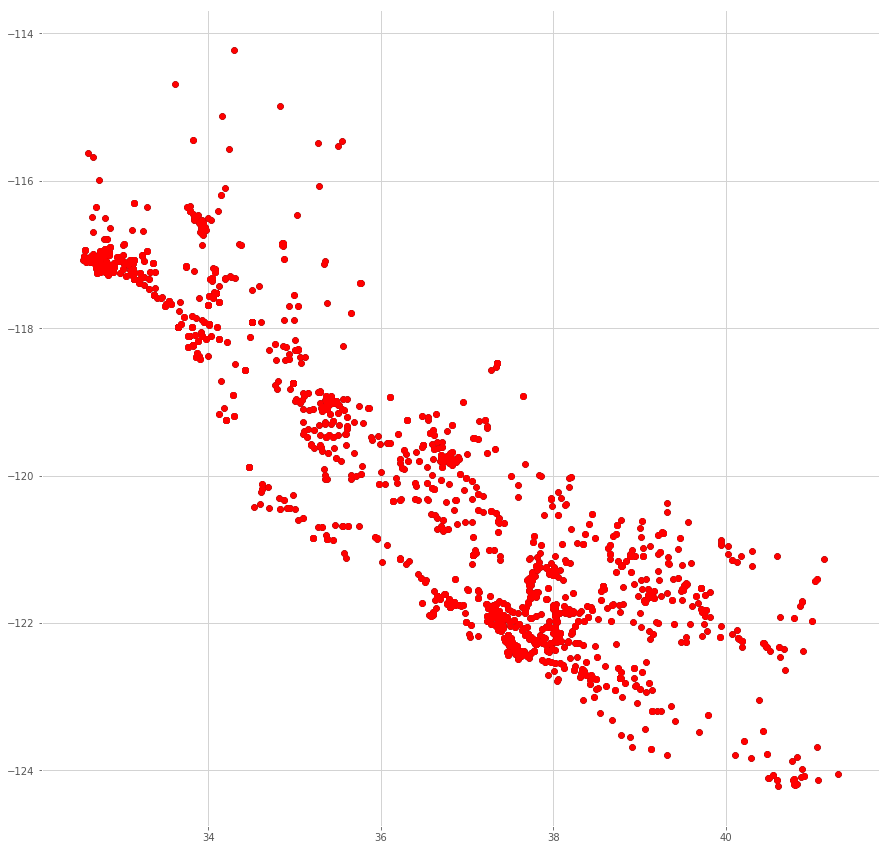

In [109]:
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(15,15))
plt.style.use('ggplot')
ax = fig.gca()
ax.set_facecolor('white')
ax.grid(color='lightgray', linestyle='-', linewidth=1)

plt.scatter(weather_latlon['lat'], weather_latlon['lon'], color = 'black')
plt.scatter(locs['latitude'], locs['longitude'], color = 'red')

ax.set_xlim=(34,35)

plt.show()

In [43]:
tmp.iloc[-20000:-19800,:]

,time,year_x,month,date,hr,opr_hr,day_x,node,dollar_mw,fuel_name,...,net_exp_MW,latitude,longitude,Unnamed: 0,year_y,day_y,hour,lat,lon,temp
2331091,2017-10-30 20:00:00,2017,10,30,20,14,Monday,POINTLMA_6_N001,-10.94702,solar,...,-5127.0,32.741558,-117.233261,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2331092,2017-10-30 20:00:00,2017,10,30,20,14,Monday,POINTLMA_6_N001,-10.94702,other,...,-5127.0,32.741558,-117.233261,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2331093,2017-10-30 20:00:00,2017,10,30,20,14,Monday,KRAMER_1_N001,23.99605,wind,...,-5127.0,34.990089,-117.542603,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2331094,2017-10-30 20:00:00,2017,10,30,20,14,Monday,KRAMER_1_N001,23.99605,solar,...,-5127.0,34.990089,-117.542603,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2331095,2017-10-30 20:00:00,2017,10,30,20,14,Monday,KRAMER_1_N001,23.99605,other,...,-5127.0,34.990089,-117.542603,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2331096,2017-10-30 20:00:00,2017,10,30,20,14,Monday,BIGMDWS_6_N001,24.25558,wind,...,-5127.0,40.171215,-121.085129,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2331097,2017-10-30 20:00:00,2017,10,30,20,14,Monday,BIGMDWS_6_N001,24.25558,solar,...,-5127.0,40.171215,-121.085129,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2331098,2017-10-30 20:00:00,2017,10,30,20,14,Monday,BIGMDWS_6_N001,24.25558,other,...,-5127.0,40.171215,-121.085129,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2331099,2017-10-30 20:00:00,2017,10,30,20,14,Monday,NEWARKD_1_N126,26.13406,wind,...,-5127.0,37.500420,-121.987152,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2331100,2017-10-30 20:00:00,2017,10,30,20,14,Monday,NEWARKD_1_N126,26.13406,solar,...,-5127.0,37.500420,-121.987152,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Open the final nodes data
Currently missing weather data still

In [5]:

nodes = pd.read_csv('nodes_final_data.csv', sep=',') #, dtype={
#         'year': 'category',
#         'month': 'category', 
#         'date': 'category',
#         'hr': 'category',
#         'opr_hr': 'category',
#         'day': 'category', 
#         'node': 'category', 
#         'dollar_mw': np.float32, 
#         'fuel_name':'category', 
#         'fuel_gen_MW': np.float32, 
#         'load_MW': np.float32,
#         'net_exp_MW': np.float32,
#         'latitude': np.float32,
#         'longitude': np.float32
#         })

nodes['time'] = pd.to_datetime(nodes['time'])

/Users/andrew/Applications/miniconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Subset out 200 nodes to play with

In [1]:
# Pull subset of data. Randomly pulling 200 nodes for all months.
def subset_data(data, size):
    node_names = list(nodes['node'].unique())

    import random
    random.seed(42) # Always have the same 200 nodes
    random.shuffle(node_names)
    node_names = node_names[:size]
    len(node_names)

    nodes_subset = nodes[nodes['node'].isin(node_names)]
    nodes_subset['node'].nunique()
    
    return nodes_subset

    nodes_subset.to_csv('nodes_subset'+str(size)+'.csv', sep=',', index=False)

# subset_data(nodes, 200)

# Open a 200 node subset to work with

In [2]:
import pandas as pd
import numpy as np
nodes200 = pd.read_csv('nodes_subset200.csv', sep=',') #, dtype={
#         'year': 'category',
#         'month': 'category', 
#         'date': 'category',
#         'hr': 'category',
#         'opr_hr': 'category',
#         'day': 'category', 
#         'node': 'category', 
#         'dollar_mw': np.float32, 
#         'fuel_name':'category', 
#         'fuel_gen_MW': np.float32, 
#         'load_MW': np.float32,
#         'net_exp_MW': np.float32,
#         'latitude': np.float32,
#         'longitude': np.float32
#         })
nodes200['time'] = pd.to_datetime(nodes200['time'])

In [3]:
# Creating dummies
nodes200 = pd.concat([nodes200, pd.get_dummies(nodes200['hr'])], axis=1)
nodes200 = pd.concat([nodes200, pd.get_dummies(nodes200['day'])], axis=1)

# Performing lag analysis

In [4]:
tmp = subset_data(nodes, 200)
tmp.set_index(['time', 'node'], inplace=True)
tmp.head(2)

NameError: name 'nodes' is not defined

First, let's look for the temporal pattern in the data. Prices should fluctuate within the day predictably.

In [6]:
import statsmodels.formula.api as smf

mod = smf.ols(formula='dollar_mw ~ C(hr)', data=tmp_demeaned)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:              dollar_mw   R-squared:                       0.221
Model:                            OLS   Adj. R-squared:                  0.221
Method:                 Least Squares   F-statistic:                     7039.
Date:                Thu, 30 Nov 2017   Prob (F-statistic):               0.00
Time:                        16:21:15   Log-Likelihood:            -1.1493e+07
No. Observations:             2351091   AIC:                         2.299e+07
Df Residuals:                 2350995   BIC:                         2.299e+07
Df Model:                          95                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

We can see that prices peak, as expected, when around 7-8 pm. We're including, however, all months from May-October here. This should vary regionally as well as by time of year. That is, nodes in the central valley, where summer afternoons are very hot, should have an earlier-peaking pattern than nodes on the coast.

In [2]:
# de-mean the data at the node level
demean = lambda x: x - x.mean()
tmp_demeaned = tmp[tmp['fuel_name']=='wind'].groupby(level = 'node').transform(demean)

#mod = smf.ols(formula='dollar_mw ~ C(hr) + C(day)', data=tmp)
#res = mod.fit()
#print(res.summary())
tmp_demeaned.head()

NameError: name 'tmp' is not defined

In [17]:
tmp_demeaned['week'] = [value[0].isocalendar()[1] for value in tmp_demeaned.index.values]
tmp_demeaned['hr'] = round(tmp_demeaned['hr'], 0) + 12

In [20]:
mod = smf.ols(formula='dollar_mw ~ C(hr) + C(week) + Tuesday + Wednesday + Thursday + Friday + Saturday + Sunday', data=tmp_demeaned)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:              dollar_mw   R-squared:                       0.354
Model:                            OLS   Adj. R-squared:                  0.354
Method:                 Least Squares   F-statistic:                     7801.
Date:                Thu, 30 Nov 2017   Prob (F-statistic):               0.00
Time:                        16:49:01   Log-Likelihood:            -3.7505e+06
No. Observations:              782097   AIC:                         7.501e+06
Df Residuals:                  782041   BIC:                         7.502e+06
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        19.4655      0.276     70.572

In [1]:
tmp_demeaned['yearday'] = tmp_demeaned['week'] * 7 +[value[0].isocalendar()[2] for value in tmp_demeaned.index.values]
mod = smf.ols(formula='dollar_mw ~ C(hr)*C(yearday)', data=tmp_demeaned)
res = mod.fit()
print(res.summary())

NameError: name 'tmp_demeaned' is not defined

In [ ]:
df['']